In [1]:
import matplotlib.pyplot as plt

from py4j.java_gateway import JavaGateway

In [2]:
%matplotlib inline

### Setting up the connection

In [3]:
gw = JavaGateway() # New gateway connection


In [4]:
bridge = gw.entry_point

### Load the model

In [5]:
# Path to Forest Fire model:
sample_models = "c:/Program Files (x86)/NetLogo 5.2.1/models/Sample Models/"
forest_fire = "Earth Science/Fire.nlogo"

In [6]:
sample_models + forest_fire

'c:/Program Files (x86)/NetLogo 5.2.1/models/Sample Models/Earth Science/Fire.nlogo'

In [7]:
bridge.openModel(sample_models + forest_fire)

### Run one iteration of the model, one command at a time:

In [8]:
bridge.command("set density 62")
bridge.command("random-seed 0")
bridge.command("setup")
bridge.command("repeat 50 [go]")

### Have the model report the number of burned trees, and store the value in a variable:

In [9]:
burned_trees = bridge.report("burned-trees")

In [10]:
print burned_trees

4256.0


### Parameter Sweep

So far so good, but not very useful. A better thing to do would be to automate a parameter sweep (for example) and be able to analyze the results right away from within Python.

In [11]:
def run_model(bridge, density, steps):
    '''
    Run the forest fire model, and return the number of trees burned.
    
    Args:
        bridge: The NetLogoBridge Java object
        density: Integer density percent, from 0 to 100
        steps: How many steps to run 
    
    Returns:
        The number of trees burned, as a float.
    '''
    bridge.command("set density " + str(density))
    bridge.command("setup")
    bridge.command("repeat " + str(steps) + " [go]")
    return bridge.report("burned-trees")

In [12]:
burned_trees = [run_model(bridge, i, 100) for i in range(0,100)]

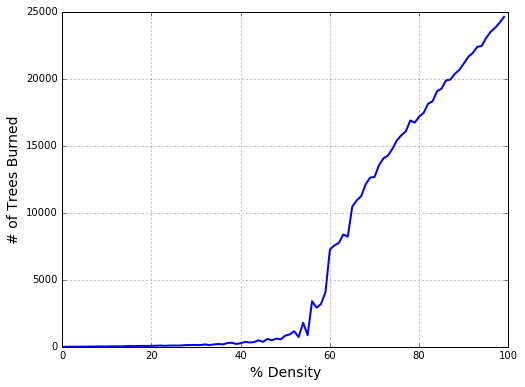

In [13]:
fig, ax = plt.subplots(figsize=(8,6))
ax.grid(True)
ax.set_xlabel("% Density", fontsize=14)
ax.set_ylabel("# of Trees Burned", fontsize=14)
plt.plot(burned_trees, linewidth=2)

## Testing out Scipy Integration

Can the NetLogo bridge be fed into one of the Scipy optimizers?

In [14]:
import numpy as np
from scipy.optimize import minimize_scalar

In [15]:
def f(d):
    return run_model(bridge, d, 50)

In [16]:
res = minimize_scalar(f, bounds=(1,100), method='bounded')

In [17]:
res

  status: 0
    nfev: 32
 success: True
     fun: 81.0
       x: 27.705287869232411
 message: 'Solution found.'

In [18]:
res.x

27.705287869232411

More parameter tweaking is required in the optimizer to make sure it's configured to find the correct solution, but this shows that it works in theory.